# Linear Regression from Scratch!

### Let's first create our loss function
![alt text](https://miro.medium.com/max/868/1*1g7XNjpxE92xo-jKxS4uow.png)

In [1]:
#Our cost function
def cost_function(m, b, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (m*x[i] + b)) ** 2
    return totalError/float(len(x))

In [2]:
#Implementation of Gradient Descent algorithm
def gradient_descent(m, b, x, y, learning_rate, num_iterations):
    N = float(len(x))
    #Repeat for number of iterations
    for j in range(num_iterations):
        m_gradient = 0
        b_gradient = 0
        for i in range(0, len(x)):
            b_gradient += -(2/N) * (y[i] - (m*x[i] + b))    #partial derivatives by b : -2(y - (mx + b))
            m_gradient += -(2/N) * x[i] * (y[i] - (m*x[i] +b))  #Partial derivatives by m : -2x(y - (mx + b))
        b -= (learning_rate * b_gradient)
        m -= (learning_rate * m_gradient)
        #Every 100 iterations we print our error
        if j%100 == 0:
            print("MSE after "+str(j)+" iterations : "+str(cost_function(m, b, x, y)))
    return [b, m]

### Let's test our Linear Regression algorithm on some test data

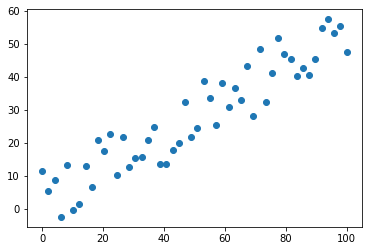

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Create some random data using linspace
x = np.linspace(0, 100, 50)  #creates a range of 50 numbers evenly spaced between 0 and 100
delta = np.random.uniform(-10, 10, x.size)
y = 0.5*x + 3 + delta
plt.scatter(x, y)

In [4]:
#Define our learning rate
learning_rate = 0.0001
#Define initial value of b and m 
b_initial = 0
m_initial = 0

#Set number of iterations we want
num_iterations = 1000

print("Initial MSE : ", cost_function(m_initial, b_initial, x, y))
[b, m] = gradient_descent(m_initial, b_initial, x, y, learning_rate, num_iterations)
print("b : ",b)
print("m : ",m)
print("MSE : ", cost_function(m, b, x, y))

Initial MSE :  1039.2011483923102
MSE after 0 iterations : 143.87321323668266
MSE after 100 iterations : 37.10813464476071
MSE after 200 iterations : 37.08946426935767
MSE after 300 iterations : 37.070985230771186
MSE after 400 iterations : 37.052695568152735
MSE after 500 iterations : 37.03459334074887
MSE after 600 iterations : 37.016676627695375
MSE after 700 iterations : 36.998943527813196
MSE after 800 iterations : 36.981392159407015
MSE after 900 iterations : 36.96402066006524
b :  0.14230575046820337
m :  0.5434008880321753
MSE :  36.9469982459774


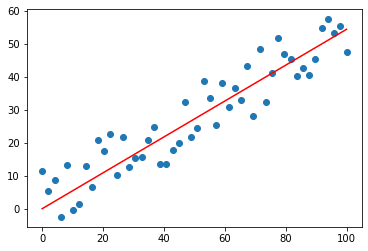

In [5]:
predictions = [(m * x[i]) + b  for i in range(len(x))]
plt.scatter(x, y)
plt.plot(x, predictions, color='red')

# Let's use Sk Learn's Linear Regression model

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

#Let's change the shape of x array to the format expected by sklearn
print(x.shape)
x = x.reshape(-1, 1) #x.reshape((-1,1))
print(x.shape)

(50,)
(50, 1)


In [7]:
#Let's create the model object using LinearRegression
model = LinearRegression()
#Fit our model to our input data x and y
model.fit(x, y)

LinearRegression()

In [8]:
#Get our model parameters
print("Y Intercept : ", model.intercept_)  #b
print("Gradient : ", model.coef_)  #m

Y Intercept :  2.6814776263052558
Gradient :  [0.50569515]


In [9]:
print("Y Intercept : ",b)
print("Gradient : ",m)

Y Intercept :  0.14230575046820337
Gradient :  0.5434008880321753


In [10]:
#Store all predictions in y_pred
y_pred = model.predict(x)

In [11]:
y

array([11.70985833,  5.46836813,  8.98603412, -2.34379326, 13.27114013,
       -0.38637897,  1.65797761, 13.2267785 ,  6.77052633, 20.96794628,
       17.66432972, 22.62160805, 10.27004635, 21.96396396, 12.90591034,
       15.41983281, 15.85037092, 21.10253096, 24.99593423, 13.57051144,
       13.79926692, 17.81344567, 20.00055803, 32.34652838, 21.77912145,
       24.65250451, 38.85107966, 33.56217714, 25.55808686, 38.18595379,
       30.86172354, 36.65551886, 32.95288721, 43.41321225, 28.33360535,
       48.53092935, 32.52559682, 41.13350695, 51.77016327, 46.89128944,
       45.42456394, 40.2260865 , 42.67684912, 40.50204155, 45.49873158,
       54.95523665, 57.53081623, 53.21394561, 55.50244048, 47.47039157])

In [12]:
y_pred

array([ 2.68147763,  3.71350854,  4.74553946,  5.77757038,  6.80960129,
        7.84163221,  8.87366313,  9.90569405, 10.93772496, 11.96975588,
       13.0017868 , 14.03381771, 15.06584863, 16.09787955, 17.12991046,
       18.16194138, 19.1939723 , 20.22600322, 21.25803413, 22.29006505,
       23.32209597, 24.35412688, 25.3861578 , 26.41818872, 27.45021964,
       28.48225055, 29.51428147, 30.54631239, 31.5783433 , 32.61037422,
       33.64240514, 34.67443605, 35.70646697, 36.73849789, 37.77052881,
       38.80255972, 39.83459064, 40.86662156, 41.89865247, 42.93068339,
       43.96271431, 44.99474522, 46.02677614, 47.05880706, 48.09083798,
       49.12286889, 50.15489981, 51.18693073, 52.21896164, 53.25099256])

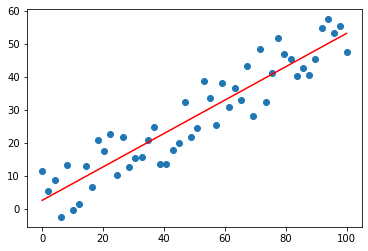

In [13]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')

In [14]:
from sklearn.metrics import mean_squared_error

print("Mean Squared error : %.2f" % mean_squared_error(y, y_pred))

Mean Squared error : 35.29


# Linear Regression on Olympic 100m Gold Times

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQTrYpw1FCRAqMEsZJRBr30sotdaZvia4NgQAWiJEuK13DAgnsZ)

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/olympic100m.csv"
df = pd.read_csv(file_name)
df.head(len(df))

,year,time
0,1896,12.00
1,1900,11.00
2,1904,11.00
3,1906,11.20
4,1908,10.80
5,1912,10.80
6,1920,10.80
7,1924,10.60
8,1928,10.80
9,1932,10.30


In [16]:
#Format data into correct shape
x = df['year']
x_train = np.array(x).reshape((-1, 1))
x_train.shape

(29, 1)

In [17]:
y_train = np.array(df['time'])

In [18]:
y_train.shape

(29,)

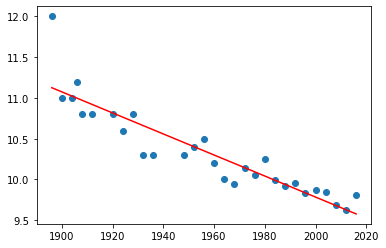

In [19]:
#Implement our regression model
import numpy as np
from sklearn.linear_model import LinearRegression

#Create model object using LinearRegression
model = LinearRegression()

#Fit our model to our input data x and y
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x, y_pred, color='r')

In [20]:
#Predict for 2020 olympics
x_2020 = np.array([2020]).reshape(-1, 1)
model.predict(x_2020)

array([9.52679525])

In [21]:
#Predict for 2020 olympics
x_2024 = np.array([2024]).reshape(-1, 1)
model.predict(x_2024)

array([9.47525458])

# Polynomial Regressions

In [22]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Importing the dataset 
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/polylinearregression.csv"
df = pd.read_csv(file_name)
df.head(7)

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [23]:
#Extract our x values, the Temperature column
x = df.iloc[:, 1:2].values

#Extract our y or target variable Pressure
y = df.iloc[:, 2].values

In [24]:
x

array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]], dtype=int64)

In [25]:
y

array([2.0e-04, 1.2e-03, 6.0e-03, 3.0e-02, 9.0e-02, 2.7e-01])

In [26]:
#Fitting Polynomial Regression to theh dataset
#Fitting Polynomial Regression on two components x and y
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9)
model_poly = poly.fit_transform(x)

lin_poly = LinearRegression()
lin_poly.fit(model_poly, y)

LinearRegression()

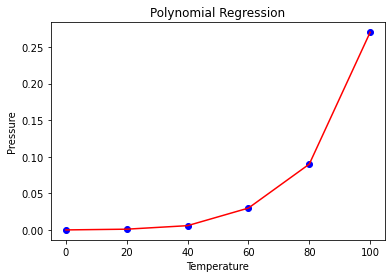

In [27]:
#Visualizing the polynomial regression results
plt.scatter(x, y, color='blue')
plt.plot(x, lin_poly.predict(model_poly), color='red')
plt.title("Polynomial Regression")
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.show()

# Multivariate Linear Regression

In [28]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Importing the dataset 
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/auto-mpg.csv"
df = pd.read_csv(file_name)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [29]:
df.shape

(398, 9)

In [30]:
#Get the indexes that have '?' instead of numbers
indexes = df[df['horsepower'] == '?'].index

In [31]:
indexes

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [32]:
#Delete these row indexes from dataframe
df.drop(indexes, inplace=True)

In [33]:
#Check once again if they have been removed or not
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [34]:
#Check the data types of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


* Let's change the data type of horsepower column

In [35]:
df['horsepower'] = df['horsepower'].astype(float)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [37]:
#Separate indepedent variables and dependent variable
x = df.iloc[:, 1:8].values
y = df.iloc[:, 0].values

In [38]:
x

array([[  8. , 307. , 130. , ...,  12. ,  70. ,   1. ],
       [  8. , 350. , 165. , ...,  11.5,  70. ,   1. ],
       [  8. , 318. , 150. , ...,  11. ,  70. ,   1. ],
       ...,
       [  4. , 135. ,  84. , ...,  11.6,  82. ,   1. ],
       [  4. , 120. ,  79. , ...,  18.6,  82. ,   1. ],
       [  4. , 119. ,  82. , ...,  19.4,  82. ,   1. ]])

In [39]:
x.shape

(392, 7)

In [40]:
y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 19. ,
       16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. , 13. ,
       18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. , 27. ,
       26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. , 17. ,
       11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. , 22. ,
       21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. , 14. ,
       15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. , 18. ,
       18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. , 22. ,
       18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. , 15. ,
       24. , 20. , 11. , 20. , 19. , 15. , 31. , 26. , 32. , 25. , 16. ,
       16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. , 26. , 31. ,
       32. , 28. , 24. , 26. , 24. , 26. , 31. , 19

In [41]:
y.shape

(392,)

In [42]:
#Implement our Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# cylinders	displacement	horsepower	weight	acceleration	model year	origin

# Data for Honda Prelude actual mpg is 24
Trial_data = np.array([8, 220, 195, 3042 , 6.7, 98, 3])
print(Trial_data.shape)
Trial_data = Trial_data.reshape((-1, 7))
print(Trial_data.shape)
Trial_data = Trial_data.astype(float)

(7,)
(1, 7)


In [44]:
model.predict(Trial_data)[0]

37.86321409762151